# Regressão Linear!

Importamos as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt #Matplotlib
import math #Funcoes matematicas
import random #Numeros Aleatorios
import numpy as np # Numeric Python
import sklearn
from sklearn import linear_model, pipeline#Modelos Lineares
from sklearn.metrics import mean_squared_error, r2_score #Metricas de erro

Carregar  os dados de treinamento [subset de 500 dados]
*Utilizamos um subset de 500 dados para os testes, *

In [ ]:
arquivo = "../../Databases/songs_training_subset_500.txt"
dados = np.genfromtxt(fname=arquivo,delimiter=',')

In [ ]:
numero_dados = dados.shape[0]
numero_features = dados.shape[1]-1
print(numero_dados)
print(numero_features)

Pequena analise dos dados

In [ ]:
'''dados_ano = {}
for i in range(len(dados)):
    ano = dados[i][0]
    indice = 60
    if ano in dados_ano.keys():
        dados_ano[ano] = dados[i][indice]
    else:
        dados_ano[ano] =  dados[i][indice]
feature1_ordenada = []
for i in sorted(dados_ano.keys()):
    dados_ano[i] = dados_ano[i]/500
    #print(i)
    feature1_ordenada.append(dados_ano[i])
plt.figure(figsize=(30,10))
plt.scatter(list(dados_ano.keys()),feature1_ordenada)
plt.show()'''

Normaliza os dados num intervalo com média 0 e desvio padrão 1

In [ ]:
def normalizar_dados(data):
    data_norm = data
    numero_features = data.shape[1]-1
    for feature_index in range(numero_features):
        media = np.mean(data[:,feature_index+1])
        desvio = np.std(data[:,feature_index+1])
        data_norm[:,feature_index+1] = (data_norm[:,feature_index+1] - media)/desvio
    return data_norm
dados = normalizar_dados(data=dados)

Separando o conjunto de treinamento em treinamento e validação, selecionando elementos aleatórios

In [ ]:
porcentagem_validacao=0.20
numero_dados_validacao = numero_dados * porcentagem_validacao
numero_dados_treinamento = numero_dados - numero_dados_validacao
conjunto_validacao = []
conjunto_treinamento = []
for i in range(0,int(numero_dados_validacao)):
    index = (random.randrange(0,len(dados)))
    elemento = dados[index]
    dados = np.delete(dados,index,0)
    conjunto_validacao.append(elemento)
conjunto_treinamento = dados
del dados
conjunto_validacao = np.asarray(conjunto_validacao)

Separando as anotações das features

In [ ]:
x_treinamento = conjunto_treinamento[:,0] #Ano da musica (Treinamento)
y_treinamento = conjunto_treinamento [:,1:numero_features+1] #Features da musica (Treinamento)
x_validacao = conjunto_validacao[:,0] #Ano da musica (Validação)
y_validacao = conjunto_validacao[:,1:numero_features+1]#Features da musica (Validação)

Criamos o objeto para realizar a regressão linear (Usamos sklearn)

In [ ]:
regressao = sklearn.linear_model.LinearRegression()

Treinamos esta regressão

In [ ]:
regressao.fit(y_treinamento,x_treinamento)

Predizemos para cada conjunto de features

In [ ]:
resultado = regressao.predict(y_validacao)

Apresentação de Resultados

In [ ]:
#print("Coeficientes:\n",regressao.coef_)
print("Mean squared error: %.2f" % mean_squared_error(x_validacao,resultado))

Mostramos o erro para cada dado do conjunto de validação

In [ ]:
for i in range(len(resultado)):
    print (str(math.floor(resultado[i])) + " - " + str(x_validacao[i]) + " = " + str(math.floor(resultado[i]) - x_validacao[i]))
    

Plotando o erro para cada dado

In [ ]:
#Criando indices
indices = range(1,len(resultado)+1)
erros = []
for i in range(len(resultado)):
    erros.append(math.fabs(resultado[i] - x_validacao[i]))
plt.figure(figsize=(40,10))
plt.plot(indices,erros)
plt.xlabel("n. Dado")
plt.ylabel("Erro")
plt.show()

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)

Regressão com normalização

In [ ]:
alfa = 100
ridge = sklearn.linear_model.Ridge(alpha=alfa)#Cria o modelo com certo alfa
ridge.fit(y_treinamento,x_treinamento)#treina 
resultado2 = ridge.predict(y_validacao)#prediz para conjunto de validaçao

Plotamos os erros dos dois modelos, comparando 

In [ ]:
#Criando indices
indices = range(1,len(resultado)+1)
erros2 = []
erros = []
for i in range(len(resultado)):
    erros.append(math.fabs(resultado[i] - x_validacao[i]))
    erros2.append(math.fabs(resultado2[i] - x_validacao[i]))
#print (len(erros),len(erros2))
plt.figure(figsize=(40,10))
plt.plot(indices,erros,color='g')
plt.plot(indices,erros2,color='r')
plt.show()


In [ ]:
print("Erro quadrado da regressão com peso %d: %.2f" % (alfa,mean_squared_error(x_validacao,resultado2)))
print("Diferença entre erros quadrados: %.2f" % (mean_squared_error(x_validacao,resultado)- mean_squared_error(x_validacao,resultado2)))


Realizamos um teste variando o alfa, de 0 a 200, de 5 a 5

In [ ]:
alfas = range(0,200+5,5)
erros = []#vetor contendo os erros para cada alfa
for i in alfas:
    ridge = sklearn.linear_model.Ridge(alpha=i)#Cria o modelo com certo alfa
    ridge.fit(y_treinamento,x_treinamento)#treina 
    resultado_i = ridge.predict(y_validacao)#prediz para conjunto de validaçao
    erro_i = mean_squared_error(x_validacao,resultado_i)
    erros.append(erro_i)


Realizamos a análise destes erros, plotando o erro para cada alfa

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(alfas,erros,color='g',marker='X')
plt.show()

Analisando o resultado, percebemos que ao aumentar o alfa, diminui o erro. Iremos iterar de 5 em 5 alfas até que começe a aumentar

In [ ]:
alfa = 0;
alfa_menor_erro = alfa;
menor_erro_encontrado = False

ridge = sklearn.linear_model.Ridge(alpha=alfa)#Cria o modelo com certo alfa
ridge.fit(y_treinamento,x_treinamento)#treina 
resultado = ridge.predict(y_validacao)#prediz para conjunto de validaçao 
menor_erro = mean_squared_error(x_validacao,resultado_i)
while not menor_erro_encontrado:
    alfa += 5
    ridge = sklearn.linear_model.Ridge(alpha=alfa)#Cria o modelo com certo alfa
    ridge.fit(y_treinamento,x_treinamento)#treina 
    resultado_i = ridge.predict(y_validacao)#prediz para conjunto de validaçao    
    erro_i = mean_squared_error(x_validacao,resultado_i)
    #print("Erro i:%f Menor:%f" % (erro_i,menor_erro))
    if(erro_i <= menor_erro):
        menor_erro = erro_i
        continue
    else:
        menor_erro_encontrado=True
print("O menor erro encontrado foi de %.2f para alfa=%d" % (menor_erro, alfa))
melhor_alfa = alfa

Com um alfa de 250, diminuimos em cerca de 36 o erro quadrado.

### Efeito da taxa de aprendizado
Para analisar os efeitos da escolha da taxa de aprendizado (learning rate), utilizaremos o método de descida de gradiente histocástica, com um número limitado de 100 iterações, e learning rates de 

-> 0.00001

-> 0.1

-> 0.5

-> 1.0

In [ ]:
iteracoes = 100
learning_rates = [0.00001,0.1,0.5,1]
erros = []
for lr in learning_rates:
    #Cria um regressor para dado learning rate
    sgd = sklearn.linear_model.SGDRegressor(alpha=melhor_alfa,max_iter=iteracoes,learning_rate="constant",eta0=lr)
    #Treina
    sgd.fit(y_treinamento,x_treinamento)
    resultado_i = sgd.predict(y_validacao)#prediz para conjunto de validaçao    
    erro_i = mean_squared_error(x_validacao,resultado_i)
    erros.append(erro_i)
    print(erro_i)

Para analisar o resultado, plotamos o erro para cada learning rate

In [ ]:
plt.figure(figsize=(16,9),dpi=100)
plt.plot(learning_rates,erros,color='g',marker='x')
#plt.xscale('symlog')
plt.show()

Plotando o erro para diferentes learning rates, observamos o resultado esperado: Para learning rates muito altos, a descida do gradiente diverge, gerando um erro quadrado maior. Para muito baixos, apesar de não tão gritante quanto para os valores mais altos, também observamos um pequeno aumento, pois devido ao número limitado de iterações, "Não dá tempo" de otimizar ainda mais o valor dos coeficientes.

Dos modelos que testamos, o que apresentou menor erro quadrado foi o Ridge, que é o método de regressão linear  com pesos de penalidade nos coeficientes, com um alfa de 250. Este modelo que escolhemos como regressor e aplicaremos no conjunto de testes.

In [2]:
#Carregamos o arquivo de treino
arquivo = "../../Databases/year-prediction-msd-train.txt"
dados = np.genfromtxt(fname=arquivo,delimiter=',')
#Calculamos as dimensionalidades
numero_dados = dados.shape[0]
numero_features = dados.shape[1]-1
#Normalizamos os dados
def normalizar_dados(data):
    data_norm = data
    numero_features = data.shape[1]-1
    for feature_index in range(numero_features):
        media = np.mean(data[:,feature_index+1])
        desvio = np.std(data[:,feature_index+1])
        data_norm[:,feature_index+1] = (data_norm[:,feature_index+1] - media)/desvio
    return data_norm
dados = normalizar_dados(data=dados)
#Separamos as features das anotations
target_treinamento = dados[:,0]
features_treinamento = dados[:,1:numero_features+1]
#Criamos e treinamos o regressor
alfa = 250
regressor = sklearn.linear_model.Ridge(alpha=alfa)#Cria o modelo com certo alfa
regressor.fit(features_treinamento,target_treinamento)#treina 
#Liberamos um pouco de memória 
del target_treinamento
del features_treinamento



# ATENÇÃO!!!!
## CONJUNTO DE TESTES
### NÃO MODIFICAR PARAMETROS APÓS EXECUÇÃO

In [3]:
#carregamos o conjunto de testes
arquivo = "../../Databases/year-prediction-msd-test.txt"
dados = np.genfromtxt(fname=arquivo,delimiter=',')
numero_dados = dados.shape[0]
numero_features = dados.shape[1]-1
def normalizar_dados(data):
    data_norm = data
    numero_features = data.shape[1]-1
    for feature_index in range(numero_features):
        media = np.mean(data[:,feature_index+1])
        desvio = np.std(data[:,feature_index+1])
        data_norm[:,feature_index+1] = (data_norm[:,feature_index+1] - media)/desvio
    return data_norm
dados = normalizar_dados(data=dados)
target_teste = dados[:,0]
features_teste = dados[:,1:numero_features+1]
del dados
resultados_teste = regressor.predict(features_teste)
del features_teste
erro_quadrado_medio = mean_squared_error(target_teste,resultados_teste)

print("Nosso resultado final (erro quadrado médio do teste): %.4f"%erro_quadrado_medio)




Nosso resultado final (erro quadrado médio do teste): 91.3162


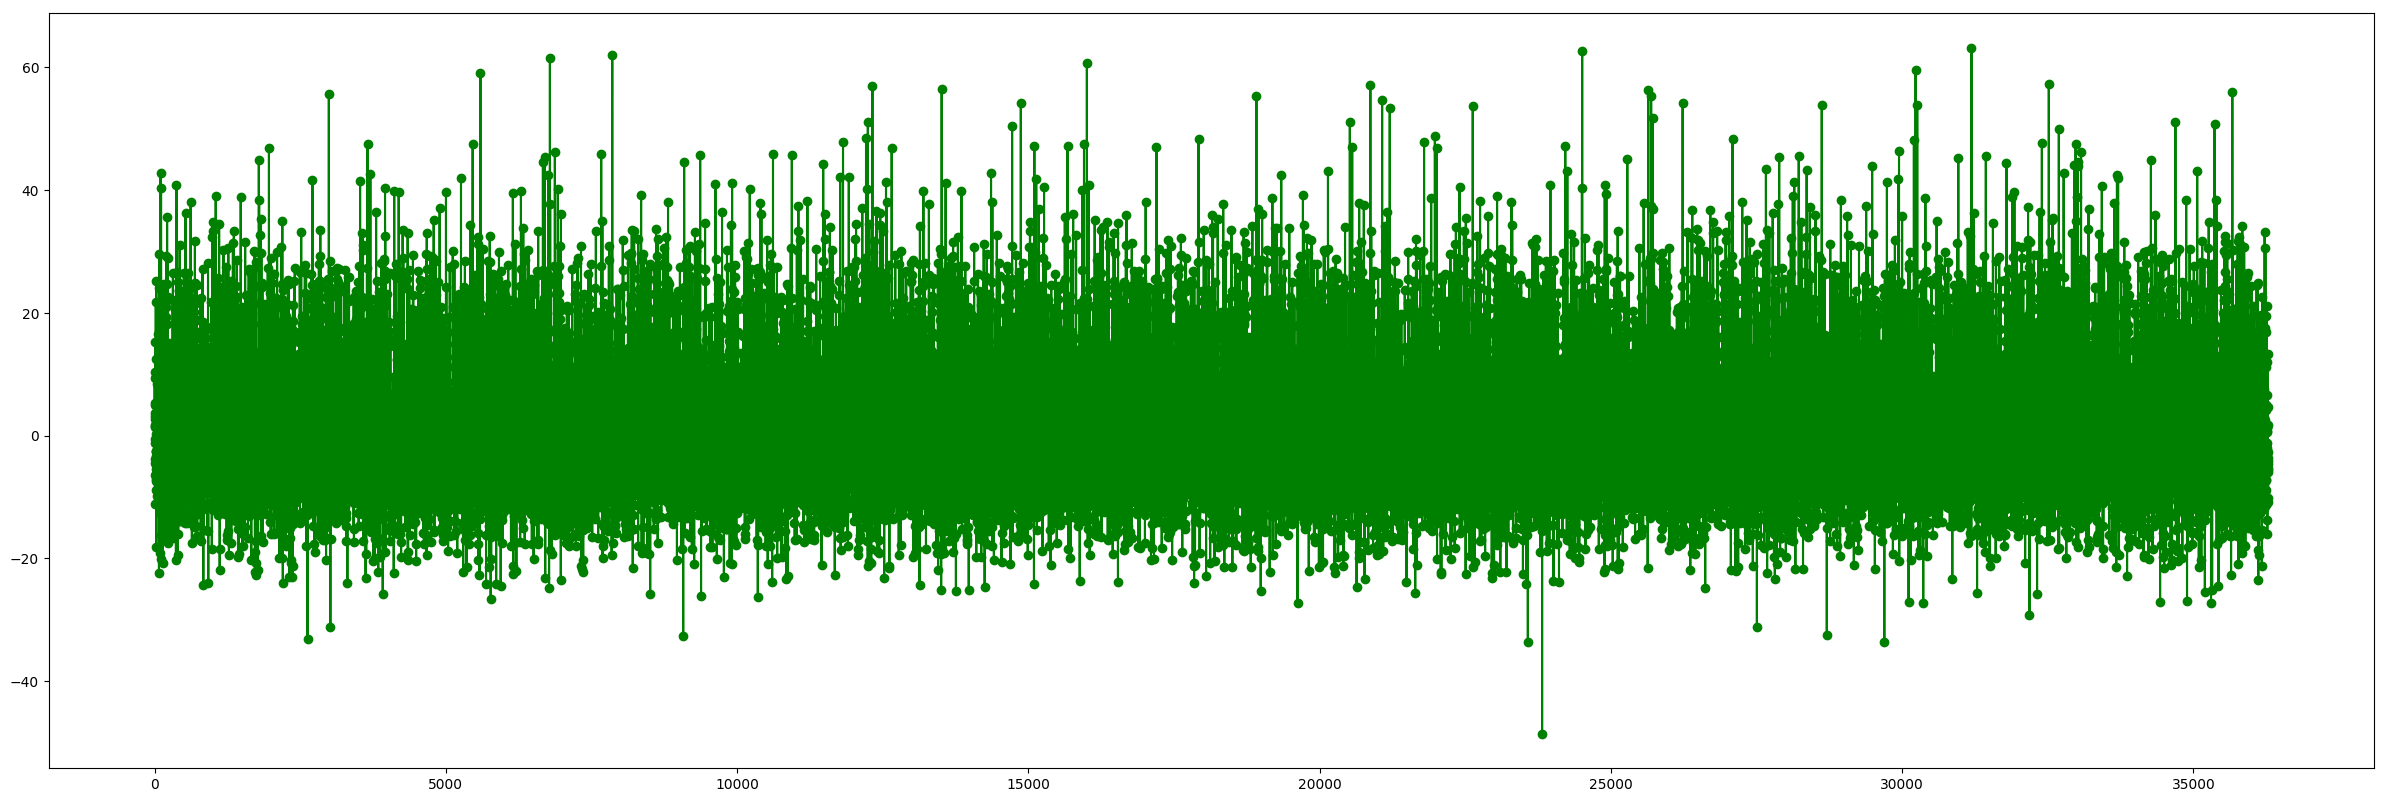

In [12]:
erros_individuais = []
for i in range(len(resultados_teste)):
    erros_individuais.append(resultados_teste[i] - target_teste[i])
   #print(resultados_teste[i] - target_teste[i])
indexes = range(len(resultados_teste))
plt.figure(figsize=(30,10),dpi=100)
plt.plot(indexes,erros_individuais,color='g',marker='o')
#plt.xscale('symlog')
plt.show()

# FIM